## Michaela Allen $-$ PHYS 513: Homework 5


1. Newman 8.2: The Lotka-Volterra equations <br>
<br>
$a)$ Write a program to solve these equations using the fourth-order Runge–Kutta method for the case $\alpha = 1$, $\beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. Have the program make a graph showing both $x$ and $y$ as a function of time on the same axes from $t = 0$ to $t = 30$. (Hint: Notice that the differential equations in this case do not depend explicitly on time $t—$in vector notation, the right-hand side of each equation is a function $f(\textbf{r})$ with no $t $dependence. You may nonetheless find it convenient to define a Python function $\verb|f(r,t)|$ including the time variable, so that your program takes the same form as programs given earlier in this chapter. You don’t have to do it that way, but it can avoid some confusion. <br>
<br>
$b)$ Describe in words what is going on in the system, in terms of rabbits and foxes.

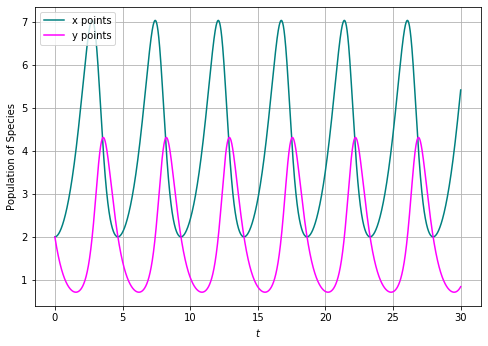

In [44]:
# 1: Newman 8.2 --- a)

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants:

alpha = 1.
beta = 0.5
gamma = 0.5
delta = 2.

x_initial = 2 
y_initial = 2 

t_start = 0
t_end = 30
N = 10000 
h = (t_end - t_start) / N

# define function f(r,t) as suggested that includes dx/dt and dy/dt:

def f(r, t):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    return np.array([fx, fy], float)

# define our range of t points and empty sets to append x and y points to:

t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []

# set up our r array:

r = np.array([x_initial, y_initial], float)

# now actually loop through using the 4th order runge-kutta method:

for t in t_points:
    x_points.append(r[0])
    y_points.append(r[1])
    
    k1 = h * f(r,t)
    k2 = h * f(r + 0.5*k1, t + 0.5*h)
    k3 = h * f(r + 0.5*k2, t + 0.5*h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2*k2 + 2*k3 + k4) / 6
    
# now plot x and y points against t points:
    
fig = plt.figure(figsize=[8, 5.5])
plt.plot(t_points, x_points, '-', color='teal', label='x points')
plt.plot(t_points, y_points, '-', color='fuchsia', label='y points')
plt.xlabel('$t$')
plt.ylabel('Population of Species')
plt.legend()
plt.grid()
plt.show()

$b)$ As the number of foxes (i.e. the x points) increases, the number of rabbits (i.e. the y points) decreases$-$ so the predators (foxes) are taking out the prey (rabbits). The foxes reach their max population size when the rabbits are at their lowest population size. Then as the population of foxes starts to decline, the number of rabbits starts to increase. Then the trend starts back over-- more rabbits means more prey for the foxes to feed on and so on. 

---

2. Newman 8.3: The Lorenz equations <br>
<br>
$a)$ Write a program to solve the Lorenz equations for the case $\sigma = 10$, $r = 28$, and $b = \frac{8}{3}$ in the range from $t = 0$ to $t = 50$ with initial conditions $(x, y, z) = (0, 1, 0)$. Have your program make a plot of $y$ as a function of time. Note the unpredictable nature of the motion. (Hint: If you base your program on previous ones, be careful. This problem has parameters $r$ and $b$ with the same names as variables in previous programs—make sure to give your variables new names, or use different names for the parameters, to avoid introducing errors into your code.) <br>
<br>
$b)$ Modify your program to produce a plot of $z$ against $x$. You should see a picture of the famous “strange attractor” of the Lorenz equations, a lop-sided butterfly-shaped plot that never repeats itself.

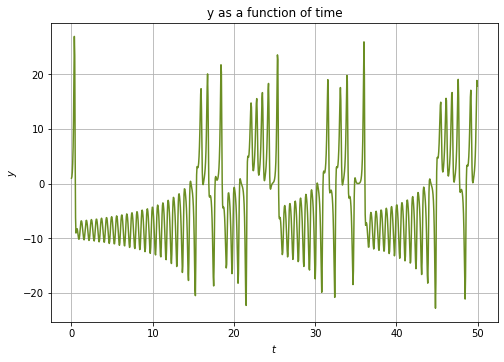

In [38]:
# 2: Newman 8.3 --- a)

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants:

sigma = 10
r = 28
b = 8./3.

x_initial = 0
y_initial = 1
z_initial = 0

t_start = 0
t_end = 50
N = 1000
h = (t_end - t_start) / N

# define function f(w,t) as suggested that includes dx/dt, dy/dt, dz/dt:

def f(w,t):
    x = w[0]
    y = w[1]
    z = w[2]
    fx = sigma * (y - x)
    fy = r*x - y - x*z
    fz = x*y - b*z
    return np.array([fx, fy, fz], float)

# define our range of t points and empty sets to append x, y, and z points to:

t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []
z_points = []

# define our w array:

w = np.array([x_initial, y_initial, z_initial], float)

# now actually loop through using the 4th order runge-kutta method:

for t in t_points:
    x_points.append(w[0])
    y_points.append(w[1])
    z_points.append(w[2])
    
    k1 = h * f(w,t)
    k2 = h * f(w + 0.5*k1, t + 0.5*h)
    k3 = h * f(w + 0.5*k2, t + 0.5*h)
    k4 = h * f(w + k3, t + h)
    w += (k1 + 2*k2 + 2*k3 + k4) / 6

    
# and plot y as a function of time:
    
fig = plt.figure(figsize=[8, 5.5])
plt.plot(t_points, y_points, '-', color='olivedrab')
plt.title('y as a function of time')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.grid()
plt.show()

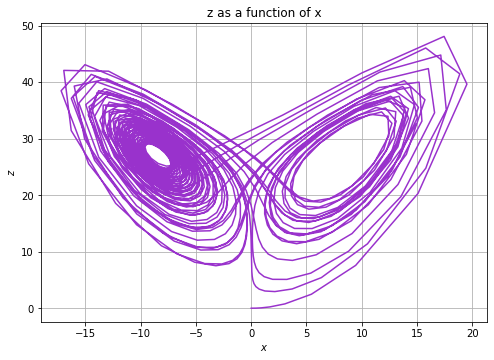

In [43]:
# 2: Newman 8.3 --- b)
# now plotting z as a function of x

fig = plt.figure(figsize=[8, 5.5])
plt.plot(x_points, z_points, '-', color='darkorchid')
plt.title('z as a function of x')
plt.xlabel('$x$')
plt.ylabel('$z$')
plt.grid()
plt.show()

---

3. Newman 8.4: Building on the results from Example 8.6 above, calculate the motion of a nonlinear pendulum as follows. <br>
<br>
$a)$ Write a program to solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge–Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta$ = 179◦ from the vertical. Make a graph of $\theta$ as a function of time. <br>
<br>
$b)$ Extend your program to create an animation of the motion of the pendulum. Your animation should, at a minimum, include a representation of the moving pendulum bob and the pendulum arm. (Hint: You will probably find the function $\verb|rate|$ discussed in Section 3.5 useful for making your animation run at a sensible speed. Also, you may want to make the step size for your Runge–Kutta calculation smaller than the frame-rate of your animation, i.e., do several Runge–Kutta steps per frame on screen. This is certainly allowed and may help to make your calculation more accurate.) <br>
<br>
For a bigger challenge, take a look at Exercise 8.15 on page 398, which invites you to write a program to calculate the chaotic motion of the double pendulum.

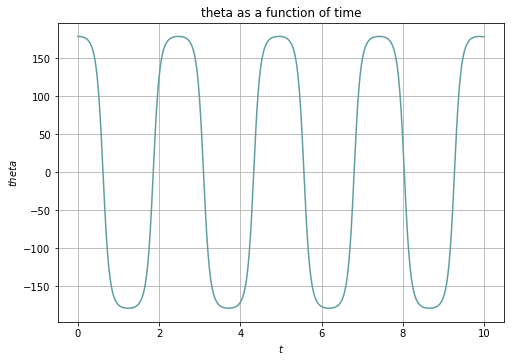

In [67]:
# 3: Newman 8.4 --- a)

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import g

# define constants:

l = 0.1 # [m] 10cm arm
theta_initial = 179 * (np.pi/180) # theta at standstill in radians!
omega_initial = 0.0

t_start = 0.0
t_end = 10.0 
N = 1000
h = (t_end - t_start) / N

# define function that includes dtheta/dt and dw/dt:

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = - g/l * np.sin(theta)
    return np.array([ftheta, fomega], float)

# define our time list and create empty sets to append theta and omega values too (even though we don't need the 
# omega values):

t_points = np.arange(t_start, t_end, h)
theta_points = []
omega_points = []

# set up our r array:

r = np.array([theta_initial, omega_initial], float)

# actually loop through with fourth order Runge-Kutta method:

for t in t_points:
    theta_points.append(r[0])
    omega_points.append(r[1])
    
    k1 = h * f(r,t)
    k2 = h * f(r + 0.5*k1, t + 0.5*h)
    k3 = h * f(r + 0.5*k2, t + 0.5*h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2*k2 + 2*k3 + k4) / 6  
    
# now need to convert theta back to degrees:    

theta1 = np.array(theta_points, float) # put our theta values in an array
theta2 = theta1 * (180/np.pi) # multiply each element in array by 180/pi

# and now plot theta as a function of time:

fig = plt.figure(figsize=[8, 5.5])
plt.plot(t_points, theta2, '-', color='cadetblue')
plt.title('theta as a function of time')
plt.xlabel('$t$')
plt.ylabel('$theta$')
plt.grid()
plt.show()

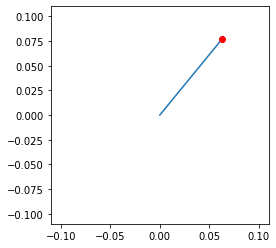

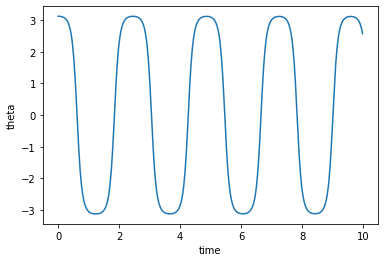

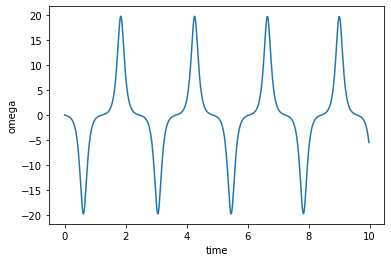

In [2]:
# 3: Newman 8.4 --- b)
# animation

from math import cos,sin,pi
from numpy import array, arange
from pylab import plot,xlabel,ylabel,show
from matplotlib import animation, rc,rcParams
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

g = 9.81
l = 0.1

def f(r,t):
    theta = r[0]                    # x value
    omega = r[1]                    # y value
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return array([ftheta,fomega],float) # return vector f
    
# Initialize

a = 0       # start of interval
b = 10      # end of interval
N = 500    # Number of steps
h = (b-a)/N # step size

tpoints = arange(a,b,h)
thetapoints = []   # theta
omegapoints = []   # omega

r = array([179*pi/180,0.0],float)

fig, ax = plt.subplots()
ax.set_aspect('equal')

for t in tpoints:
    thetapoints.append(r[0])
    omegapoints.append(r[1]) 
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1, t+0.5*h)
    k3 = h*f(r+0.5*k2, t+0.5*h)
    k4 = h*f(r+k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    x = l * sin(r[0])
    y = -l * cos(r[0])
    ax.plot([0,x],[0,y])
    ax.plot([x],[y],'ro')
    ax.set_ylim([-.11,.11])
    ax.set_xlim([-.11,.11])
    clear_output(wait=True)
    display(fig)
    ax.clear()

plt.close()
fig, ax = plt.subplots()

                      
plot(tpoints,thetapoints)
#plot(tpoints,ypoints)
xlabel("time")
ylabel("theta")
show()

plot(tpoints,omegapoints)
xlabel("time")
ylabel("omega")
show()

---

4. Newman 8.6: Harmonic and anharmonic oscillators <br>
<br>
$a)$ Using the methods described in the preceding section, turn this second-order equation into two coupled first-order equations. Then write a program to solve them for the case $\omega = 1$ in the range from $t = 0$ to $t = 50$. A second-order equation requires two initial conditions, one on $x$ and one on its derivative. For this problem use $x = 1$ and $\frac{dx}{dt} = 0$ as initial conditions. Have your program make a graph showing the value of $x$ as a function of time. <br>
<br>
$b)$ Now increase the amplitude of the oscillations by making the initial value of $x$ bigger$-$say $x = 2-$and confirm that the period of the oscillations stays roughly the same. <br>
<br>
$c)$ Modify your program to solve for the motion of the anharmonic oscillator described by the equation $$ \frac{d^{2}x}{dt^{2}} = -\omega^{2}x^{3} .$$ Again take $\omega$ = 1 and initial conditions $x = 1$ and $\frac{dx}{dt} = 0$ and make a plot of the motion of the oscillator. Again increase the amplitude. You should observe that the oscillator oscillates faster at higher amplitudes. (You can try lower amplitudes too if you like, which should be slower.) The variation of frequency with amplitude in an anharmonic oscillator was studied previously in Exercise 5.10. <br>
<br>
$d)$ Modify your program so that instead of plotting $x$ against $t$, it plots $\frac{dx}{dt}$ against $x$, i.e., the “velocity” of the oscillator against its “position.” Such a plot is called a phase space plot. <br>
<br>
$e)$ The $\textit{van der Pol oscillator}$, which appears in electronic circuits and in laser physics, is described by the equation $$ \frac{d^{2}x}{dt^{2}} - \mu(1 - x^{2}) \frac{dx}{dt} + \omega^{2}x = 0 $$ Modify your program to solve this equation from $t = 0$ to $t = 20$ and hence make a phase space plot for the van der Pol oscillator with $w = 1$, $\mu = 1$, and initial conditions $x = 1$ and $\frac{dx}{dt} = 0$. Try it also for $\mu = 2$ and $\mu = 4$ (still with $\omega = 1$). Make sure you use a small enough value of the time interval $h$ to get a smooth, accurate phase space plot.

    

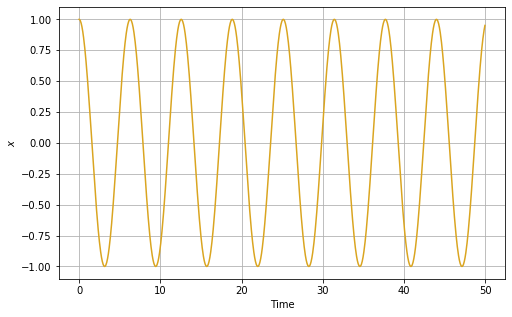

In [55]:
# 4: Newman 8.6 --- a)

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants: 

w = 1


N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 1
v_initial = 0 # dx/dt

def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, x * -w**2], float)

t_points = np.arange(t_start, t_end, h)
x_points = []
r = np.array([x_initial, v_initial], float)

for t in t_points:
    x_points.append(r[0])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
fig = plt.figure(figsize=[8, 5])
plt.plot(t_points, x_points, color='goldenrod')
plt.xlabel('Time')
plt.ylabel('$x$')
plt.grid()
plt.show()

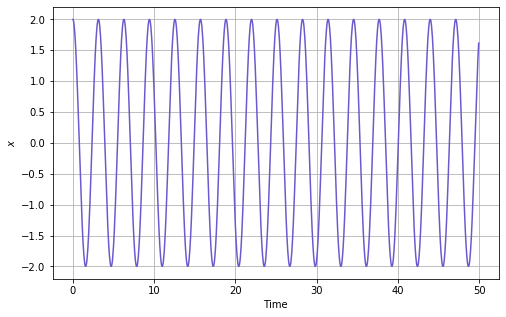

Period of oscillation seems to stay the same.


In [43]:
# 4: Newman 8.6 --- b)
# same as above, increasing amplitude to x_initial = 2

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants: 

omega = 1


N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 2
v_initial = 0 # dx/dt

def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, x * -w**2], float)

t_points = np.arange(t_start, t_end, h)
x_points = []
r = np.array([x_initial, v_initial], float)

for t in t_points:
    x_points.append(r[0])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
fig = plt.figure(figsize=[8, 5])
plt.plot(t_points, x_points, color='slateblue')
plt.xlabel('Time')
plt.ylabel('$x$')
plt.grid()
plt.show()

print('Period of oscillation seems to stay the same.')

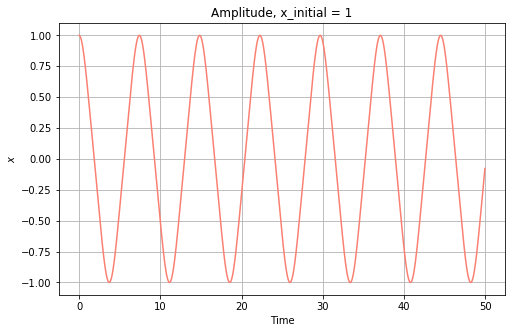

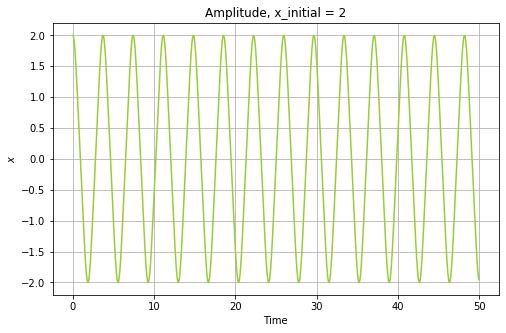

We an see that the oscillator oscillates faster here at higher amplitudes.


In [56]:
# 4: Newman 8.6 --- c)
# again, same code as a), except now -w^2 * x^3

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants: 

w = 1


N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 1
v_initial = 0 # dx/dt

def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, x**3 * -w**2], float)

t_points = np.arange(t_start, t_end, h)
x_points = []
r = np.array([x_initial, v_initial], float)

for t in t_points:
    x_points.append(r[0])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
fig = plt.figure(figsize=[8, 5])
plt.plot(t_points, x_points, color='salmon')
plt.title('Amplitude, x_initial = 1')
plt.xlabel('Time')
plt.ylabel('$x$')
plt.grid()
plt.show()

###############################################
# running again with higher amplitude:


# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants: 

omega = 1


N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 2
v_initial = 0 # dx/dt

def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, x**3 * -w**2], float)

t_points = np.arange(t_start, t_end, h)
x_points = []
r = np.array([x_initial, v_initial], float)

for t in t_points:
    x_points.append(r[0])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
fig = plt.figure(figsize=[8, 5])
plt.plot(t_points, x_points, color='yellowgreen')
plt.title('Amplitude, x_initial = 2')
plt.xlabel('Time')
plt.ylabel('$x$')
plt.grid()
plt.show()

print('We an see that the oscillator oscillates faster here at higher amplitudes.')

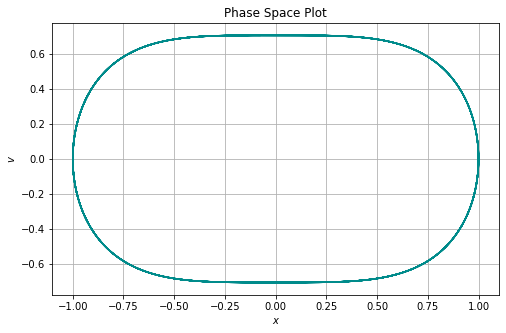

In [57]:
# 4: Newman 8.6 --- d)
# now running the anharmonic one again with amplitude=1 and making a phase space plot:

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants: 

w = 1


N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 1
v_initial = 0 # dx/dt

def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, x**3 * -w**2], float)

t_points = np.arange(t_start, t_end, h)
x_points = []
v_points = []
r = np.array([x_initial, v_initial], float)

for t in t_points:
    x_points.append(r[0])
    v_points.append(r[1])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
fig = plt.figure(figsize=[8, 5])
plt.plot(x_points, v_points, color='darkcyan')
plt.title('Phase Space Plot')
plt.xlabel('$x$')
plt.ylabel('$v$')
plt.grid()
plt.show()

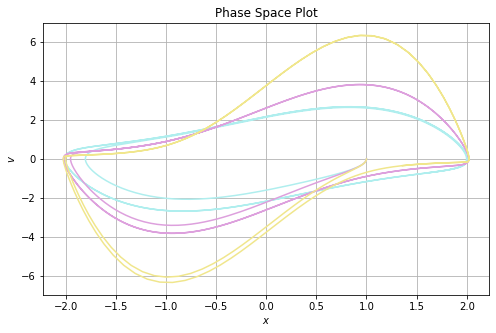

In [69]:
# 4: Newman 8.6 --- e)

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants: 

w = 1
mu = 1

N = 1000
t_start = 0
t_end = 20
h = (t_end - t_start) / N

x_initial = 1
v_initial = 0 # dx/dt

def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, mu*(1-x**2)*v - x * w**2], float)
 
t_points = np.arange(t_start, t_end, h)
x_points = []
v_points = []
r = np.array([x_initial, v_initial], float)

for t in t_points:
    x_points.append(r[0])
    v_points.append(r[1])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

# solving now with mu = 2:
    
mu = 2

t_points = np.arange(t_start, t_end, h)
x_points2 = []
v_points2 = []
r = np.array([x_initial, v_initial], float)

for t in t_points:
    x_points2.append(r[0])
    v_points2.append(r[1])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
# solving now with mu = 4:
    
mu = 4

t_points = np.arange(t_start, t_end, h)
x_points4 = []
v_points4 = []
r = np.array([x_initial, v_initial], float)

for t in t_points:
    x_points4.append(r[0])
    v_points4.append(r[1])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6


fig = plt.figure(figsize=[8, 5])
plt.plot(x_points, v_points, color='paleturquoise', label='mu=1')
plt.plot(x_points2, v_points2, color='plum', label='mu=2')
plt.plot(x_points4, v_points4, color='khaki', label='mu=4')
plt.title('Phase Space Plot')
plt.xlabel('$x$')
plt.ylabel("$v$")
plt.grid()
plt.show()

---

5. Newman 8.7: Trajectory with air resistance <br>
<br>
$a)$ on paper! <br>
<br>
$b)$ Change these two second-order equations into four first-order equations using the methods you have learned, then write a program that solves the equations for a cannonball of mass 1 kg and radius 8 cm, shot at 30◦ to the horizontal with initial velocity 100ms−1. The density of air is $\rho = 1.22$ kgm−3 and the coefficient of drag for a sphere is $C = 0.47$. Make a plot of the trajectory of the cannonball (i.e., a graph of $y$ as a function of $x$). <br>
<br>
$c)$ When one ignores air resistance, the distance traveled by a projectile does not depend on the mass of the projectile. In real life, however, mass certainly does make a difference. Use your program to estimate the total distance traveled (over horizontal ground) by the cannonball above, and then experiment with the program to determine whether the cannonball travels further if it is heavier or lighter. You could, for instance, plot a series of trajectories for cannonballs of different masses, or you could make a graph of distance traveled as a function of mass. Describe briefly what you discover.

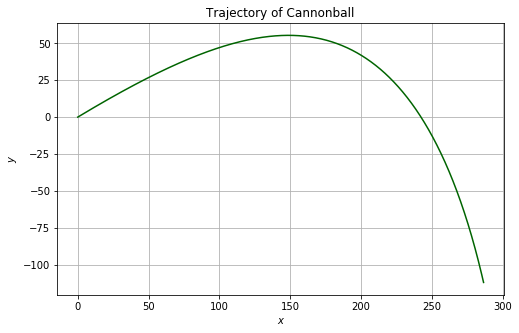

In [99]:
# 5: Newman 8.7 --- b)

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

# define constants:

m = 1 # [kg] mass of cannonball
R = 8e-2 # [m] radius
theta = 30 * (np.pi/180) # radians
rho = 1.22
C = 0.47

v_initial = 100 # [m/s]

N = 1000
t_start = 0
t_end = 10
h = (t_end - t_start) / N

constant = (np.pi * R**2 * rho * C) / 2*m # defining a constant that comprises all the other constants

# defining function that includes x,y,vx, and vy:

def f(r,t):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    
    return np.array([vx, -constant*vx*np.sqrt(vx**2 + vy**2), vy, -g - constant*vy*np.sqrt(vx**2 + vy**2)], float)

# make our range of time points and empty sets for x and y points:

t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []

r = np.array([0, v_initial * np.cos(theta), 0, v_initial * np.sin(theta)], float)

# loop through using RK Method:

for t in t_points:
    x_points.append(r[0])
    y_points.append(r[2])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
# plot y as a function of x --- trajectory:    
    
fig = plt.figure(figsize=[8, 5])
plt.plot(x_points, y_points, color='darkgreen')
plt.title('Trajectory of Cannonball')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

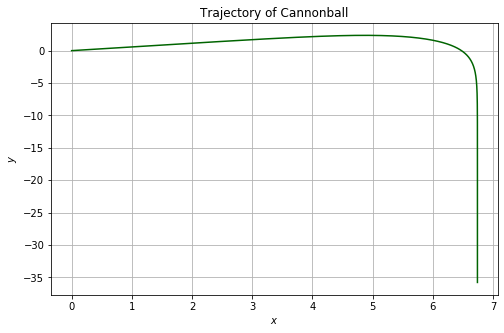

In [97]:
# 5: Newman 8.7 --- c)
# look at different masses

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

# define constants:

m = 100 # [kg] mass of cannonball
R = 8e-2 # [m] radius
theta = 30 * (np.pi/180) # radians
rho = 1.22
C = 0.47

v_initial = 100 # [m/s]

N = 1000
t_start = 0
t_end = 10
h = (t_end - t_start) / N

constant = (np.pi * R**2 * rho * C) / 2*m # defining a constant that comprises all the other constants

# defining function that includes x,y,vx, and vy:

def f(r,t):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    
    return np.array([vx, -constant*vx*np.sqrt(vx**2 + vy**2), vy, -g - constant*vy*np.sqrt(vx**2 + vy**2)], float)

# make our range of time points and empty sets for x and y points:

t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []

r = np.array([0, v_initial * np.cos(theta), 0, v_initial * np.sin(theta)], float)

# loop through using RK Method:

for t in t_points:
    x_points.append(r[0])
    y_points.append(r[2])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
# plot y as a function of x --- trajectory:    
    
fig = plt.figure(figsize=[8, 5])
plt.plot(x_points, y_points, color='darkgreen')
plt.title('Trajectory of Cannonball')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

$c) continued$ By increasing the mass, as seen above (m = 100 kg), we can see that the trajectories "flatline" out at the top. You would think that more mass means a longer distance traveled-- and this is true! But it's only to a certain limit.

---

6. Newman 8.9: Vibration in a one-dimensional system <br>
<br>
$a)$ Write a program to solve for the motion of the masses using the fourth-order Runge– Kutta method for the case we studied previously where $m = 1$ and $k = 6$, and the driving forces are all zero except for $F_{1} = cos\omega t$ with $\omega = 2$. Plot your solutions for the displacements $\xi_{i}$ of all the masses as a function of time from $t = 0$ to $t = 20$ on the same plot. Write your program to work with general $N$, but test it out for small values$-N = 5$ is a reasonable choice. <br>
<br>
You will need first of all to convert the $N$ second-order equations of motion into $2N$ first order equations. Then combine all of the dependent variables in those equations into a single large vector $\textbf{r}$ to which you can apply the Runge–Kutta method in the standard fashion. <br>
<br>
$b)$ Modify your program to create an animation of the movement of the masses, represented as spheres on the computer screen. You will probably find the $\verb|rate|$ function discussed in Section 3.5 useful for making your animation run at a sensible speed.

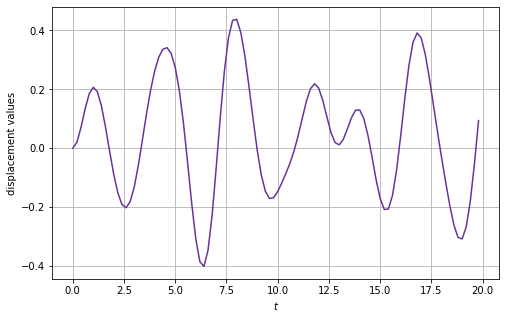

In [14]:
# 6: Newman 8.9 --- a)

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants:

N = 5 # number of masses
m = 1
k = 6
w = 2

t_start = 0
t_end = 20
i = 100
h = (t_end - t_start) / i

# converted the N second-order eqs of motion into 2N first-order eqs
# combine all dependent variables in those eqs into a single larger vector r that we can
# apply the RK method to:

def f(r, t):
    array = np.empty(2*N, float)
    F1 = np.cos(w*t)
    
    for i in range(2*N):
        if i < N:
            array[i] = r[i + N]
        elif i == N:
            array[i] =  k / m * (r[1] - r[0]) + 1 / m * F1
        elif i == 2 * N - 1:
            array[2 * N - 1] = k / m * (r[N - 2] - r[N - 1])
        else:
            array[i] = k / m * (r[i + 1 - N] - 2 * r[i - N] + r[i - 1 - N])
            
    return array

t_points = np.arange(t_start, t_end, h)
vals = [] # empty set to append displacement values to 

r = np.zeros(2*N, float)  # initial displacements and speeds = 0

# now actually doing the Runge Kutta method:

for t in t_points:
    vals.append(np.copy(r[0 : N]))
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
# now plot:

fig = plt.figure(figsize=[8, 5])
plt.plot(t_points, np.array(vals,float)[:, 0], color='rebeccapurple')
plt.xlabel("$t$")
plt.ylabel('displacement values')
plt.grid()
plt.show()

In [14]:
# 6: Newman 8.9 --- b)
# animation

---

7. Newman 8.12: Orbit of the Earth <br>
<br>
$a)$ Write a program to calculate the orbit of the Earth using the Verlet method, Eqs. (8.77) and (8.78), with a time-step of $h = 1$ hour. Make a plot of the orbit, showing several complete revolutions about the Sun. The orbit should be very slightly, but visibly, noncircular. <br>
<br>
$b)$ The gravitational potential energy of the Earth is $\frac{-GMm}{r}$, where $m = 5.9722 \times 10^{24}$ kg is the mass of the planet, and its kinetic energy is $\frac{1}{2}mv^{2}$ as usual. Modify your program to calculate both of these quantities at each step, along with their sum (which is the total energy), and make a plot showing all three as a function of time on the same axes. You should find that the potential and kinetic energies vary visibly during the course of an orbit, but the total energy remains constant. <br>
<br>
$c)$ Now plot the total energy alone without the others and you should be able to see a slight variation over the course of an orbit. Because you’re using the Verlet method, however, which conserves energy in the long term, the energy should always return to its starting value at the end of each complete orbit. 

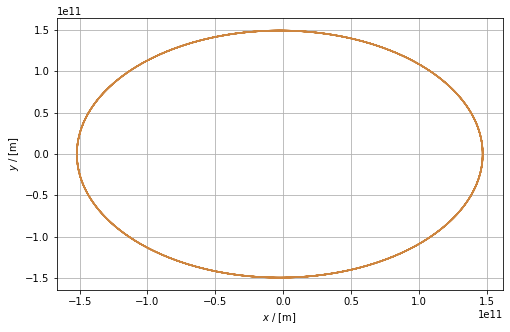

In [30]:
# 7: Newman 8.12 --- a)

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants:

G = 6.6738e-11
M = 1.9891e30 # [kg] mass of Sun
m = 5.9722e24 # [kg] mass of Earth

x_initial = 1.4710e11 # [m] Earth at perihelion
y_initial = 0 

vx_initial = 0
vy_initial = 3.0287e4 # [m/s]

t_start = 0
t_end = 1.577e8 # 5 years in seconds
h = 3600 # seconds -- time step

def f(r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    drdt = -G*M * 1 / (np.sqrt(x**2 + y**2))**3
    return np.array([vx, drdt*x, vy, drdt*y], float)

t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []
r = np.array([x_initial, vx_initial, y_initial, vy_initial], float)

# first perform a half step to calc v(t+0.5h) for x and y:

f_half = 0.5*h*f(r)
vx_half = r[1] + f_half[1]
vy_half = r[3] + f_half[3]

# now loop through the equations:

for t in t_points:
    x_points.append(r[0])
    y_points.append(r[2])

    r[0] += h*vx_half
    r[2] += h*vy_half
    k = h * f(r)
    r[1] = vx_half + 0.5*k[1]
    r[3] = vy_half + 0.5*k[3]
    f_half = 0.5*h*f(r)
    vx_half += k[1]
    vy_half += k[3]
    
# now plot the orbit:

fig = plt.figure(figsize=[8, 5])
plt.plot(x_points, y_points, color='peru')
plt.xlabel('$x$ / [m]')
plt.ylabel('$y$ / [m]')
plt.grid()
plt.show()

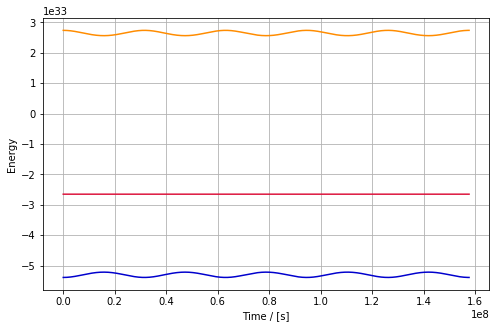

In [53]:
# 7: Newman 8.12 --- b)
# same code as above, add in potential and kinetic energies
# then plot potential, kinetic, and total energies on same plot:

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define constants:

G = 6.6738e-11
M = 1.9891e30 # [kg] mass of Sun
m = 5.9722e24 # [kg] mass of Earth

x_initial = 1.4710e11 # [m] Earth at perihelion
y_initial = 0 

vx_initial = 0
vy_initial = 3.0287e4 # [m/s]

t_start = 0
t_end = 1.577e8 # 5 years in seconds
h = 3600 # seconds -- time step

def f(r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    drdt = -G*M * 1 / (np.sqrt(x**2 + y**2))**3
    return np.array([vx, drdt*x, vy, drdt*y], float)

t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []
r = np.array([x_initial, vx_initial, y_initial, vy_initial], float)

potential = []
kinetic = []

# first perform a half step to calc v(t+0.5h) for x and y:

f_half = 0.5*h*f(r)
vx_half = r[1] + f_half[1]
vy_half = r[3] + f_half[3]

# now loop through the equations:

for t in t_points:
    x_points.append(r[0])
    y_points.append(r[2])

    potential.append(-G*M*m / np.sqrt(r[0]**2 + r[2]**2))
    kinetic.append(0.5*m* (r[1]**2 + r[3]**2))
    
    r[0] += h*vx_half
    r[2] += h*vy_half
    k = h * f(r)
    r[1] = vx_half + 0.5*k[1]
    r[3] = vy_half + 0.5*k[3]
    f_half = 0.5*h*f(r)
    vx_half += k[1]
    vy_half += k[3]
    
# add kinetic and potential together to get total energy:

total = np.array(potential, float) + np.array(kinetic, float)
    
# plot potential, kinetic, and total(sum) energies on same plot:

fig = plt.figure(figsize=[8, 5])
plt.plot(t_points, total, color='crimson', label='Total')
plt.plot(t_points, potential, color='mediumblue', label='Potential')
plt.plot(t_points, kinetic, color='darkorange', label='Kinetic')
plt.xlabel('Time / [s]')
plt.ylabel('Energy')
plt.grid()
plt.show()

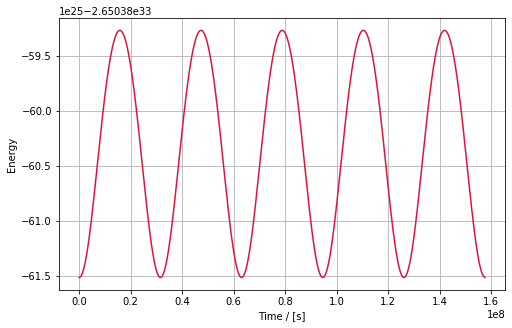

In [33]:
# 7: Newman 8.12 --- c)
# now just plotting total energy so we can see that it does in fact oscillate:

fig = plt.figure(figsize=[8, 5])
plt.plot(t_points, total, color='crimson', label='Total')
plt.xlabel('Time / [s]')
plt.ylabel('Energy')
plt.grid()
plt.show()

---

8. Newman 8.15: The double pendulum <br>
<br>
$a)$ on paper! <br>
<br>
$b)$ Write a program using the fourth-order Runge–Kutta method to solve the equations of motion for the case where $\mathscr{l} = 40$ cm, with the initial conditions $\theta_{1} = \theta_{2} =$ 90◦ and $\omega_{1} = \omega_{2} = 0$. Use your program to calculate the total energy of the system assuming that the mass of the bobs is 1 kg each, and make a graph of energy as a function of time from $t = 0$ to $t = 100$ seconds. <br>
<br>
Because of energy conservation, the total energy should be constant over time (actually it should be zero for this particular set of initial conditions), but you will find that it is not perfectly constant because of the approximate nature of the solution of the differential equation. Choose a suitable value of the step size $h$ to ensure that the variation in energy is less than $10^{-5}$ Joules over the course of the calculation. <br>
<br>
$c)$ Make a copy of your program and modify the copy to create a second program that does not produce a graph, but instead makes an animation of the motion of the double pendulum over time. At a minimum, the animation should show the two arms and the two bobs. <br>
Hint: As in Exercise 8.4 you will probably find the function rate useful in order to make your program run at a steady speed. You will probably also find that the value of $h$ needed to get the required accuracy in your solution gives a frame-rate much faster than any that can reasonably be displayed in your animation, so you won’t be able to display every time-step of the calculation in the animation. Instead you will have to arrange the program so that it updates the animation only once every several Runge–Kutta steps.

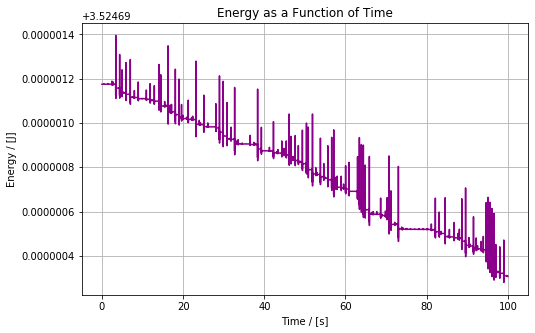

In [93]:
# 8: Newman 8.15 --- b)

# necessary imports:

import numpy as np
from scipy.constants import g
import matplotlib.pyplot as plt

# define constants:

l = 0.4 # [m]
m = 1 # [kg]
gl = g / l

theta1_initial = 90 * (180/np.pi)
theta2_initial = 90 * (180/np.pi)
w1_initial = 0
w2_initial = 0

N = 100000 # large N so variation is < 10^-5 Joules 
t_start = 0
t_end = 100
h = (t_end - t_start) / N

# define function to calculate w1 and w2 primes:

def f(r):
    theta1 = r[0]
    w1 = r[1]
    theta2 = r[2]
    w2 = r[3]
    
    fw1 = - (w1**2 * np.sin(2*theta1 - 2*theta2) + 2*w2**2 * np.sin(theta1 - theta2) + gl*(np.sin(theta1 
            - 2*theta2) + 3*np.sin(theta1)) ) / (3 - np.cos(2*theta1 - 2*theta2))
    
    fw2 = (4*w1**2 * np.sin(theta1 - theta2) + w2**2 * np.sin(2*theta1 - 2*theta2) + 2*gl*(np.sin(2*theta1 - theta2)
            - np.sin(theta2))) / (3 - np.cos(2*theta1 - 2*theta2))
    
    return np.array([w1, fw1, w2, fw2], float)

# now define another function that calculates total energy:

def total_energy(r):
    theta1 = r[0]
    w1 = r[1]
    theta2 = r[2]
    w2 = r[3]
    
    return -m*g*l*(2*np.cos(theta1) + np.cos(theta2)) + m*l**2 * (w1**2 + 0.5*w2**2 + w1*w2*np.cos(theta1 - theta2))

# define our range of time points, empty sets to append values to, and our r array:

t_points = np.arange(t_start, t_end, h)
theta1_points = []
theta2_points = []
energy_points = []

r = np.array([theta1_initial, w1_initial, theta2_initial, w2_initial], float)

# now use RK Method:

for t in t_points:
    theta1_points.append(r[0])
    theta2_points.append(r[2])
    energy_points.append(total_energy(r))
    
    k1 = h * f(r)
    k2 = h * f(r + 0.5 * k1)
    k3 = h * f(r + 0.5 * k2)
    k4 = h * f(r + k3)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
# now plot energy as a function of time:

fig = plt.figure(figsize=[8, 5])
plt.plot(t_points, energy_points, color='darkmagenta')
plt.title('Energy as a Function of Time')
plt.xlabel('Time / [s]')
plt.ylabel('Energy / [J]')
plt.grid()
plt.show()

In [19]:
# 8: Newman 8.15 --- c)
# animation

---